In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = (10,5)

In [3]:
cols = ['a', 'b']
data = pd.read_csv('mydata/data.csv', header = None, names = cols)

In [4]:
data.head()

,a,b
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [5]:
x = data.drop('b', axis = 1)
y = data['b']

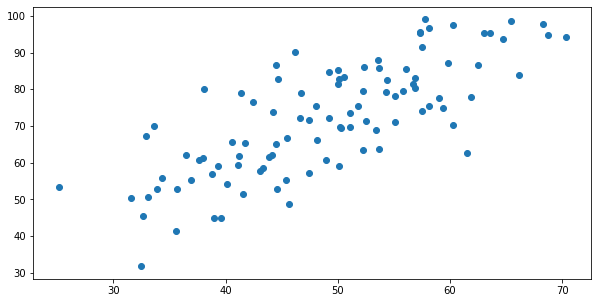

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [8]:
y_pred_lr = lr.predict(x)

In [9]:
print("Intercept :", lr.intercept_)
print("Coefficient ", lr.coef_[0])

Intercept : 13.642154681481571
Coefficient  1.1927057602312432


In [10]:
#Gradyan İniş (Gradient Descent) kullanılırsa:

In [11]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

In [14]:
m = 0
c = 0

L = 0.0001 #learning rate
epochs = 1000

n = float(len(X))

for i in range(epochs):
    Y_pred = m*X + c #Y'nin mevcut tahmin edilen değeri
    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)
    m = m - L * D_m
    c = c - L * D_c
    
print("Intercept : ", m)
print("Coefficient :", c)

Intercept :  1.4582620978635645
Coefficient : 0.13106568099591231


In [15]:
Y_pred = m*X + c

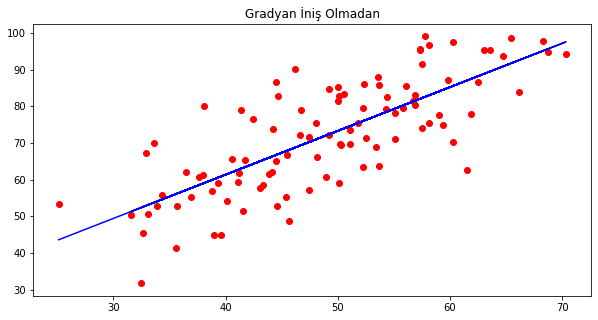

In [17]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lr.predict(x), color = 'blue')
plt.title("Gradyan İniş Olmadan")
plt.show()

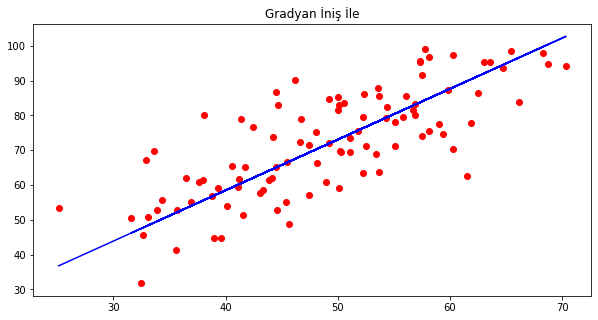

In [19]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, Y_pred, color = 'blue')
plt.title("Gradyan İniş İle")
plt.show()

In [20]:
#Logistic Regression 

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
dataset = pd.read_csv('mydata/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
X = dataset.drop(['Purchased', 'User ID', 'Gender'], axis = 1)
y = dataset['Purchased']

In [24]:
X.shape, y.shape

((400, 2), (400,))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0)
classifier.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ["Original Purchased", "Predicted Purchased"])
hesaplama

,Original Purchased,Predicted Purchased
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


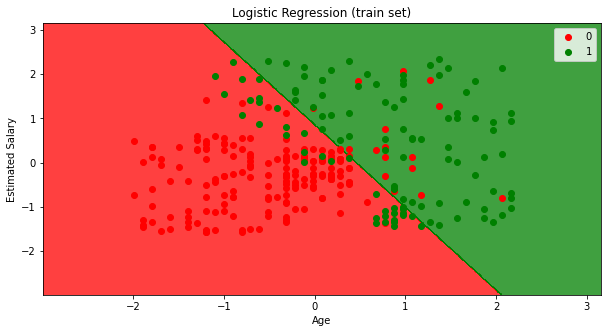

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


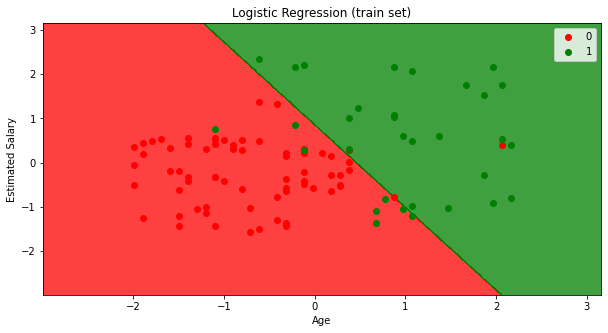

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#Sınıflandırmada kullanılan değerlendirme metrikleri
"""
1- Confusion Matrix
2- Accuracy
3- Precision
4- Recall
5- Specificity
6- F1-score
"""

In [32]:
#K-En yakın komşu algoritması 

In [33]:
#Mesafe Metrikleri
"""
1- Euclidean mesafesi (L2 norm) : sqrt((x1-x2)^2 + (y1-y2)^2)
2- Manhattan mesafesi (L1 norm) : |x1 - x2| + |y1 - y2|
3- Minkowski mesafesi (Lp norm) : (|x1-x2|^p + |y1-y2|^p)^(1/p)
4- Hamming mesafesi -> Large ve Medium (1), Large ve Large (0) 
"""

'\n1- Euclidean mesafesi (L2 norm) : sqrt((x1-x2)^2 + (y1-y2)^2)\n2- Manhattan mesafesi (L1 norm) : |x1 - x2| + |y1 - y2|\n3- Minkowski mesafesi (Lp norm) : (|x1-x2|^p + |y1-y2|^p)^(1/p)\n4- Hamming mesafesi -> Large ve Medium (1), Large ve Large (0) \n'

In [36]:
data = pd.read_csv('mydata/data_cleaned.csv')
data.shape

(891, 25)

In [37]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [38]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [42]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 56)

In [45]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [46]:
clf = KNN(n_neighbors = 10, metric = 'euclidean') #K = 10
clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
k_1 = f1_score(test_predict, y_test)

In [47]:
def Elbow(K):
    test_error = []
    
    for i in K:
        clf = KNN(n_neighbors=i)
        clf.fit(X_train, y_train)
        tmp = clf.predict(X_test)
        tmp = f1_score(tmp, y_test)
        error = 1 - tmp
        test_error.append(error)
        
    return test_error

In [48]:
k = range(6, 30, 2)
test = Elbow(k)

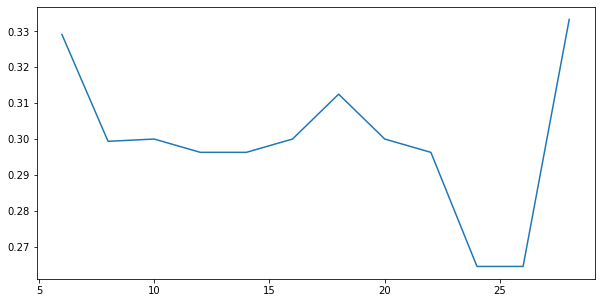

In [49]:
plt.plot(k, test)
plt.show()

In [50]:
#K = 27

In [52]:
clf = KNN(n_neighbors = 27, metric = 'euclidean')
clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
k_2 = f1_score(test_predict, y_test)

In [53]:
print("Dirsek öncesi Knn skoru :", k_1)
print("Dirsek sonrası Knn skoru :", k_2)

Dirsek öncesi Knn skoru : 0.7000000000000001
Dirsek sonrası Knn skoru : 0.751592356687898
